In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [2]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

### Conjunto de dados pequeno e com ruído

In [3]:
# Sets the number of examples.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
y = 2 + x1 + 0.5*x1**2 # Second order polynomial.

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

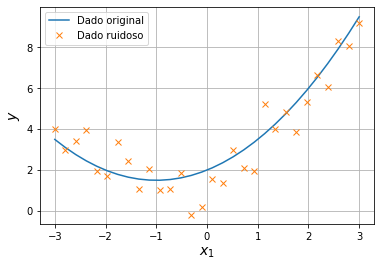

In [4]:
plt.plot(x1, y, label='Dado original')
plt.plot(x1, y_noisy, 'x', label='Dado ruidoso')
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
#Show the plot.
plt.show()

### Regressão polinomial com funções hipótese com ordens diferentes. 

Para criar os modelos de regressão polinomial, utilizamos 4 classes da biblioteca SciKit-Learn: `PolynomialFeatures`, `StandardScaler`, `LinearRegression` e `Pipeline`, as quais têm suas funções explicadas a seguir:

+ `PolynomialFeatures`: Cria a matriz de atributos polinomiais de acordo com a ordem passada para o construtor da classe. O objeto desta classe transforma os atributos de entrada, criando combinações polinomiais com grau igual ao especificado. A classe pode ser configurada para adicionar o atributo de bias ou não através do parâmetro `include_bias`. Para mais informações, leia a documentação da classe: [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomialfeatures#sklearn.preprocessing.PolynomialFeatures).
    + Exemplo para um polinômio de ordem 2 em uma variável (i.e., atributo), $x_1$, com peso de bias (i.e., $a_0$). Nesse caso a matriz de atributos terá o seguinte formato 
$$\textbf{X} = [\textbf{x}_0, \textbf{x}_1, \textbf{x}_1^2], $$
onde $\textbf{x}_0$ é vetor de atributos de bias, ou seja, o vetor com todos os valores iguais a 1 e $\textbf{x}_1$ é o vetor com todos os valores do atributo $x_1$.
    


+ `StandardScaler`: Realiza a padronização dos atributos. O escalonamento de atributos se torna imprescindível quando utilizamos funções hipótese polinomiais pois os termos do polinômio podem fazer com que os valores dos atributos tenham valores muito grandes. Por exemplo, se $x$ varia entre 0 e 10, $x^2$ irá variar entre 0 e 100 e assim por diante. Para mais informações, leia a documentação da classe: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler).


+ `LinearRegression`: Realiza a regressão linear com a matriz de atributos polinomial escalonada. Esta implementação utiliza a equação normal para resolver o problema da regressão. Para mais informações, leia a documentação da classe: [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression).


+ `Pipeline`: Sequencializa a aplicação de transformadores (e.g., `PolynomialFeatures`, `StandardScaler`) aos dados e ao final treina e realiza predições com o objeto da classe `LinearRegression`. Para mais informações, leia a documentação da classe: [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html?highlight=pipeline#sklearn.pipeline.Pipeline).

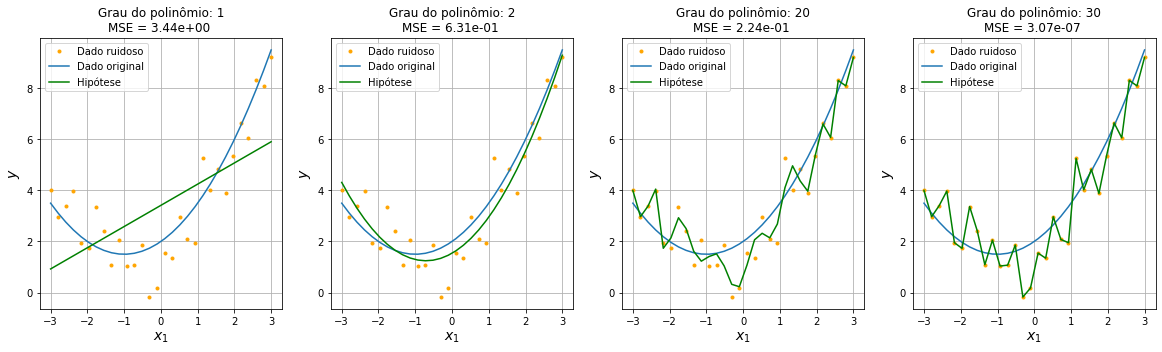

In [5]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)  

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e} ".format(degrees[i], mse))

#Show the plot.
plt.show()

#### Observações

+ O polinômio de ordem 1 (i.e., uma reta) **não consegue se contorcer o suficiente para aproximar a função verdadeira**.
    + O polinômio de ordem 1 não tem flexibilidade (i.e., graus de liberdade) o suficiente para capturar o comportamento da função objetivo.
    + Comportamento conhecido como **subajuste** ou **underfitting**, do inglês.


+ O polinômio de ordem 2 se ajusta bem à função verdadeira.


+ Já os polinômios de ordem 20 e 30 têm flexibilidade tão alta que se ajustam não à função verdadeira, mas sim aos dados ruidosos.
    + É como se o modelo **memorizasse** os dados de treinamento.
    + Comportamento conhecido como **sobreajuste** ou **overfitting**, do inglês.


+ Como podemos percerber, o erro quadrático médio (MSE) é menor para o polinômio de ordem 30, pois devido à sua "complexidade/flexibilidade" ele se "ajusta" quase que perfeitamente aos dados de treinamento, "aprendendo" até o ruído presente.
    + A predição feita com o próprio conjunto usado para o treinamento resulta em uma função idêntica à aprendidada pelo modelo, resultado em um erro praticamente nulo.

### Conjunto de dados pequeno, porém, sem ruído

In [6]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [7]:
# Sets the number of examples.
N = 30

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function
y = 2 + x1 + 0.5*x1**2

# Observable function.
y_noisy = y

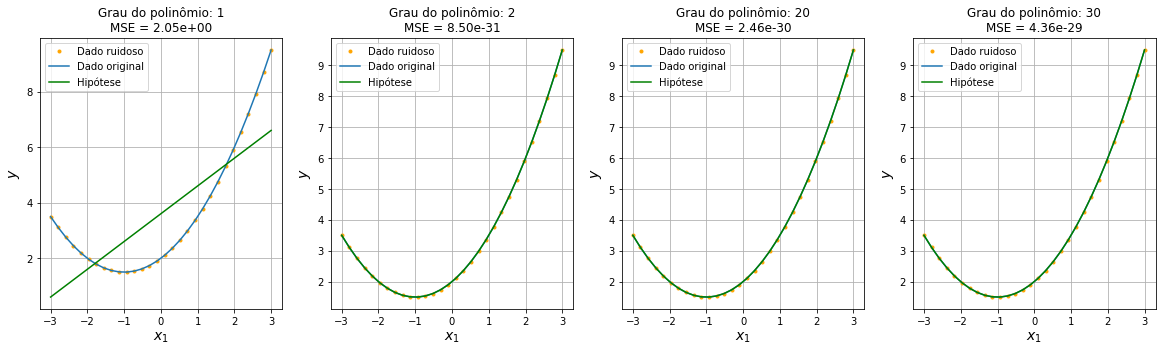

In [8]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20, 30]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)  

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

#### Observações

+ Como não existe ruído sendo adicionado aos exemplos do modelo gerador, qualquer polinômio com ordem maior ou igual à ordem do polinômio (neste caso, 2) já consegue aproximar perfeitamente os dados de treinamento.


+ Porém, mesmo sem ruído algum, a reta (polinômio de ordem 1) não tem flexibilidade o suficiente para capturar o comportamento da função objetivo.

### Conjunto de treinamento maior (1000 amostras) e com ruído

In [9]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [10]:
# Sets the number of examples.
N = 1000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function
y = 2 + x1 + 0.5*x1**2

# Noise.
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

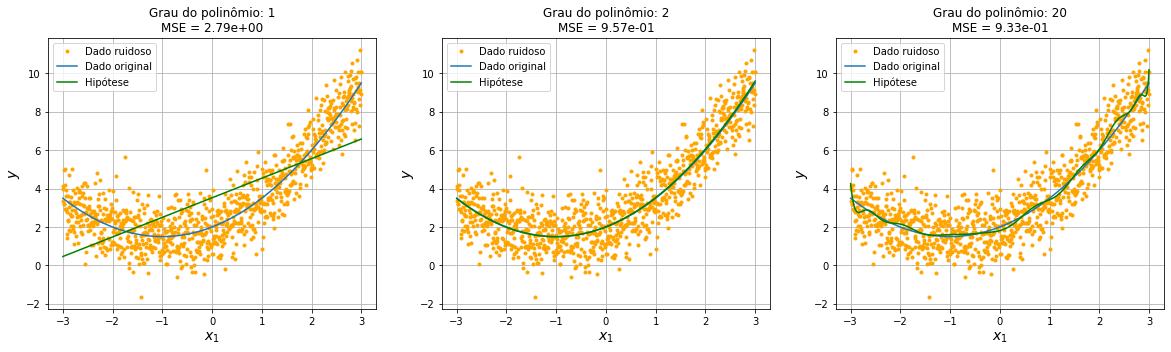

In [11]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1) 

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)
    
    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

#### Observações

+ A aproximação é melhor quanto maior for o conjunto de treinamento. 


+ Para ordem 2, vamos que o aumento do conjunto de treinamento resultou em um modelo melhor. 


+ Porém, com o aumento da ordem do polinômio, percebemos que o modelo começa a se sobreajustar aos dados de treinamento, mas pecebam que ele se sobreajusta menos, pois o número de amostras é muito maior do que a ordem do modelo.


+ No caso de um polinômio de ordem 1, não importa o quão grande seja o conjunto de treinamento, ele nunca irá se ajustar ao modelo gerador, pois não tem flexibilidade o suficiente.

### Conjunto de treinamento maior ainda (100.000 amostras)

In [12]:
# Reset pseudo random number generator so that the results are reproducible.
np.random.seed(42)

In [13]:
# Sets the number of examples.
N = 100000

# Attribute.
x1 = np.linspace(-3, 3, N).reshape(N, 1)

# Create target function.
y = 2 + x1 + 0.5*x1**2

# Noise. 
w = np.random.randn(N, 1)

# Observable function.
y_noisy = y + w

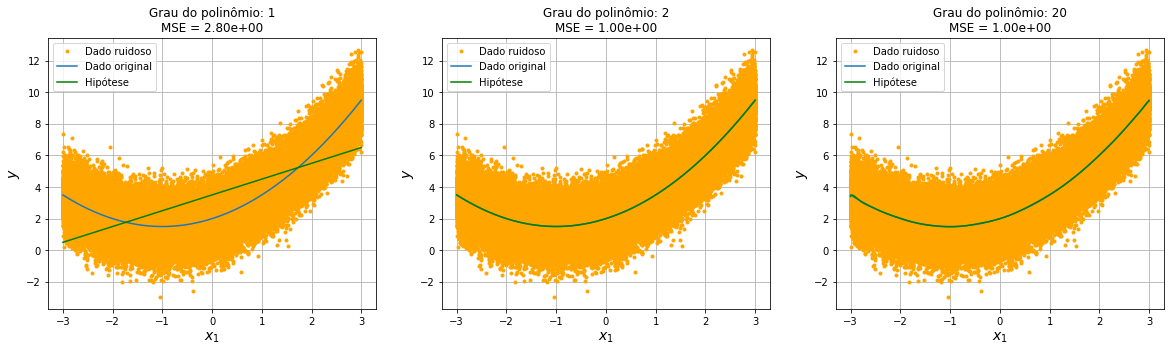

In [14]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20]

# Include column of ones once the target function has a bias.
include_bias = True

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)    

    # Instantiate a polynomial with the given degree.
    poly = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler that will standardize the features.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    # Train the polinomial model, i.e., the hypothesis.
    polynomial_regression.fit(x1, y_noisy)
    
    # Use the trained model for prediction.
    yp1 = polynomial_regression.predict(x1)    
    
    # Calculate the Mean Squared Error (MSE) between target and predicted values.
    mse = mean_squared_error(y_noisy, yp1)

    plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
    plt.plot(x1, y, label='Dado original')
    plt.plot(x1, yp1, 'g', label='Hipótese')
    plt.legend(loc='best')
    plt.xlabel('$x_1$', fontsize=14)
    plt.ylabel('$y$', fontsize=14)
    plt.grid()
    plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))

#Show the plot.
plt.show()

#### Observações

+ Encontra-se os pesos que fazem com que a função hipótese polinomial escolhida tenha o **erro** (quadrático) **médio** minimizado para todos os valores de $x_1$. 


+ Vejam que como a ordem do polinômio é muito menor do que a quantidade de amostras, a função hipótese polinomial escolhida não se ajusta perfeitamente aos pontos, mas acaba se ajustando à média dos valores de $y$ naquele determinado valor de $x_1$.


+ Como utilizamos muitos exemplos de treinamento, a capacidade (i.e., flexibilidade) do modelo não é suficiente para passar por todos os pontos, ele então deixa de aprender o ruído para se concentrar em aprender a função por trás do processo de geração dos dados.


+ A figura abaixo deixa isso mais claro.

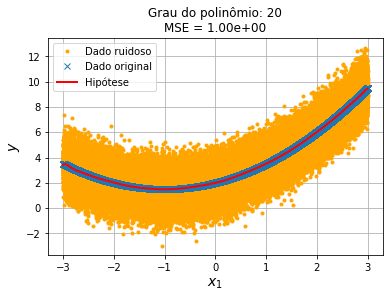

In [16]:
plt.plot(x1, y_noisy, '.', color='orange', label='Dado ruidoso')
plt.plot(x1, y, 'x', label='Dado original')
plt.plot(x1, yp1, 'r', linewidth=2, label='Hipótese')
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.title("Grau do polinômio: {}\nMSE = {:.2e}".format(degrees[i], mse))
plt.show()